<a href="https://colab.research.google.com/github/aneeshghisad/BTech-Project/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving milk_data_changed.csv to milk_data_changed.csv


In [3]:
milk = pd.read_csv('milk_data_changed.csv')

In [4]:
milk.head(5)

,pH,Temprature,Odor,Turbidity,Colour,Grade
0,6.6,35,0,0,254,high
1,6.6,36,1,1,253,high
2,8.5,70,1,1,246,low
3,9.5,34,1,1,255,low
4,6.6,37,0,0,255,medium


In [5]:
# Check for missing data
print("Missing values:\n", milk.isnull().sum())

Missing values:
 pH            0
Temprature    0
Odor          0
Turbidity     0
Colour        0
Grade         0
dtype: int64


In [6]:
labels = milk.pop('Grade')

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(milk, labels, test_size=0.25,random_state=8)

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


In [12]:
print(x_train.dtypes)   # DataFrame → .dtypes
print(y_train_enc.dtype)  # NumPy array → .dtype


pH            float64
Temprature      int64
Odor            int64
Turbidity       int64
Colour          int64
dtype: object
int64


In [14]:
#Converting Dataset into DMatrix
xgb_train = xgb.DMatrix(x_train, label=y_train_enc, enable_categorical=True)
xgb_test = xgb.DMatrix(x_test, label=y_test_enc, enable_categorical=True)


In [15]:
#Creating XGboost Model
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 4,
    'learning_rate': 0.1,
    'eval_metric': 'merror' #  measures direct classification accuracy
}

n = 100
model = xgb.train(params=params, dtrain=xgb_train, num_boost_round=n)


In [18]:
y_pred = model.predict(xgb_test)


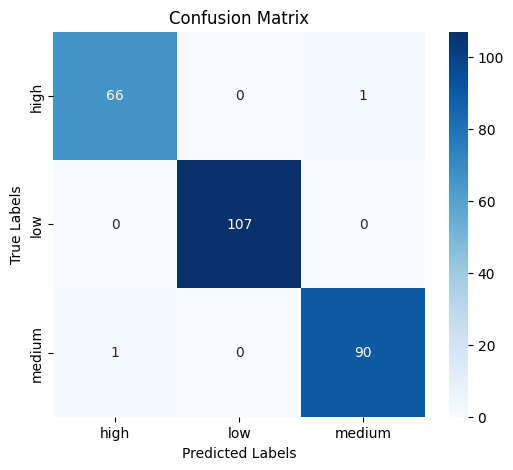

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test_enc, y_pred)

# Define class labels (optional)
labels = le.classes_  # ['high', 'low', 'medium']

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


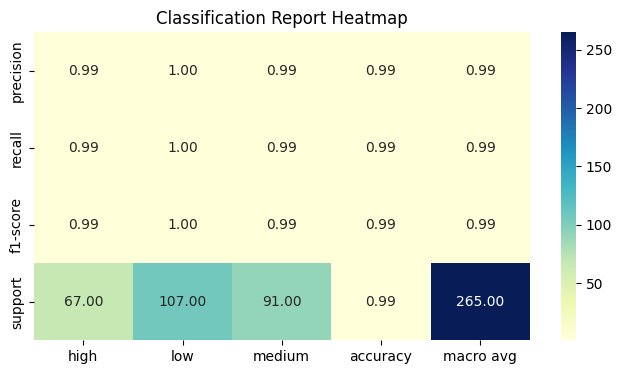

In [34]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report as a dictionary
report = classification_report(y_test_enc, y_pred, target_names=le.classes_, output_dict=True)

# Convert to DataFrame for visualization
report_df = pd.DataFrame(report).transpose()

# Plot as heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate individual metrics
accuracy = accuracy_score(y_test_enc, y_pred)
precision = precision_score(y_test_enc, y_pred, average='macro')
recall = recall_score(y_test_enc, y_pred, average='macro')
f1 = f1_score(y_test_enc, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9924528301886792
Precision: 0.9913618719588868
Recall: 0.9913618719588868
F1-score: 0.9913618719588868


In [32]:
sample = {
    'pH': 3.8,
    'Temprature': 25,
    'Odor': 0,
    'Turbidity': 0,
    'Colour': 244,
}
sample_df = pd.DataFrame([sample])
sample_dmatrix = xgb.DMatrix(sample_df, enable_categorical=True)

predicted_grade = model.predict(sample_dmatrix)
decoded_grade = le.inverse_transform([int(predicted_grade[0])])[0] #decoding back from 0,1,2 to low,medium,high

print("Predicted Milk Grade:", decoded_grade)


Predicted Milk Grade: low
